In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
dataset=pd.read_csv("Preprocessed_stud_score.csv")

In [16]:
dataset

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


In [17]:
dataset.columns

Index(['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores',
       'exam_score'],
      dtype='object')

In [18]:
independent=dataset[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]

In [19]:
dependent=dataset[['exam_score']]

In [20]:
#Model Selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [21]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
print(r_score)

0.8551473979402313


In [27]:
#Standard Scaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.svm import SVR
regressor=SVR(kernel="linear")
regressor.fit(X_train,y_train) 
y_predict=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
print(r_score)

0.8175427025470888


In [22]:
#RandomForest
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, criterion ='poisson', random_state=0)
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
print(r_score)

0.7580527087515163


In [30]:
#DecisionTree
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)
from sklearn.tree import DecisionTreeRegressor, plot_tree
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_predict)
print(r_score)

0.326928437801945


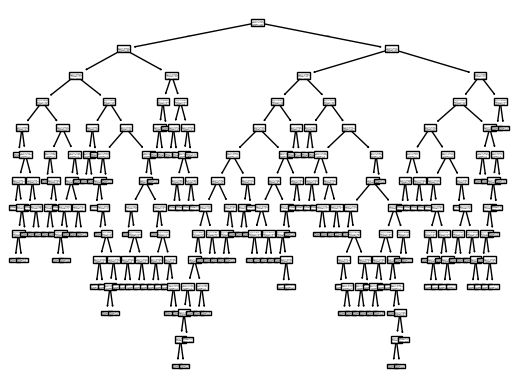

In [31]:
from sklearn import  tree
tree.plot_tree(regressor)
plt.show()

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression

def selectkbest(independent, dependent, n):
    test = SelectKBest(score_func=f_regression, k=n)
    fit1 = test.fit(independent, dependent.values.ravel())
    selectk_features = fit1.transform(independent)
    return selectk_features

kbest = selectkbest(independent, dependent, 3)

In [54]:
kbest

array([[  8. ,  72.1,  45. ],
       [  1.3,  60.7,  55. ],
       [  4. ,  73.7,  86. ],
       [  3.5,  95.1,  66. ],
       [  9.1,  89.8,  71. ],
       [  8.4,  58.5,  75. ],
       [ 10.8,  54.2,  88. ],
       [  2. ,  75.8,  55. ],
       [  5.6,  81.6,  84. ],
       [  1.3,  66.8,  70. ],
       [  3.4,  90.9,  81. ],
       [  6.6,  87.6,  85. ],
       [  1.3,  83.6,  71. ],
       [  3.2,  61.2,  68. ],
       [  8.1,  60. ,  90. ],
       [  7. ,  51.2,  41. ],
       [  3.4,  62.2,  45. ],
       [  7.5,  73.8,  58. ],
       [  9.9,  92.5,  54. ],
       [  1.1,  53.6,  65. ],
       [  9.9,  70.7,  84. ],
       [  8.7,  81.5,  55. ],
       [  4.7,  59.7,  59. ],
       [  2.7,  84.8,  82. ],
       [ 11.5,  74.7,  77. ],
       [  4.7,  62.2,  63. ],
       [  2. ,  82.8,  70. ],
       [  2.1,  50.3,  75. ],
       [ 10.3,  87.5,  73. ],
       [  7.6,  88.5,  62. ],
       [  9.9,  55.3,  67. ],
       [  9. ,  71.3,  87. ],
       [  6.9,  58.8,  75. ],
       [ 1